# <font color=blue>Assignments for "Simple Linear Regression"</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [2]:
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.set_index('Id', inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**(1)** Investigate the data and do any necessary data cleaning.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
df.shape

(1460, 80)

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_null_ratios = df.isna().sum() / len(df)

In [8]:
df_null_ratios = df.isna().sum() / len(df)

df_null_ratios[df_null_ratios > .1]

LotFrontage    0.177397
Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [9]:
df.drop(df_null_ratios[df_null_ratios > .1].index, axis=1, inplace=True)

In [10]:
df.isna().sum()[df.isna().sum() > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
print(len(df))
print(len(df.dropna()))

1460
1338


In [12]:
df.dropna(inplace=True)

In [13]:
print("Number of categorical variables: {}".format((df.dtypes == object).sum()))

Number of categorical variables: 38


In [14]:
print("Number of numeric variables: {}".format(((df.dtypes == int) | (df.dtypes == float)).sum()))

Number of numeric variables: 36


In [15]:
df.select_dtypes(object).nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      14
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         4
Foundation        5
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.


In [16]:
df['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

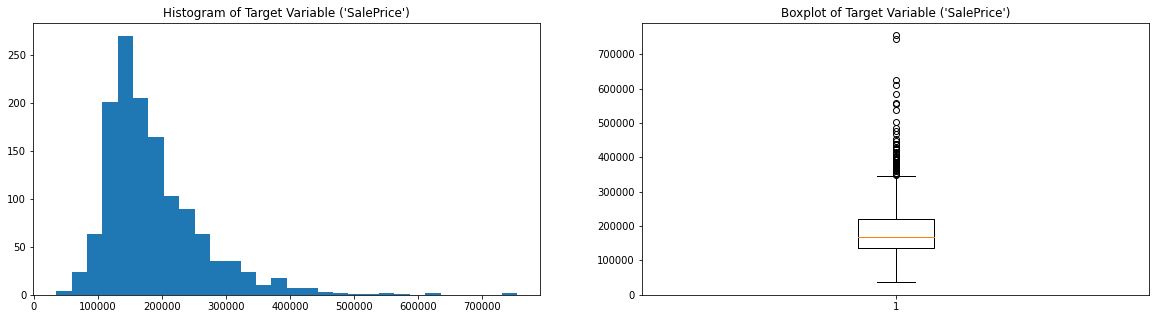

In [17]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=30)
plt.title("Histogram of Target Variable ('SalePrice')")

plt.subplot(1, 2, 2)
plt.boxplot(df['SalePrice'])
plt.title("Boxplot of Target Variable ('SalePrice')")

plt.show()

In [18]:
df.corr()['SalePrice'][df.corr()['SalePrice'] > 0.5].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
YearRemodAdd    0.501435
Name: SalePrice, dtype: float64

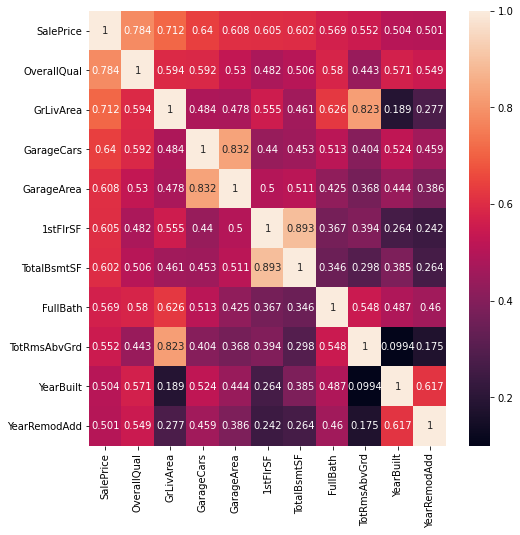

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[df.corr()['SalePrice'][df.corr()['SalePrice'] > 0.5].sort_values(ascending=False).index].corr(), annot=True, fmt='.3g')
plt.show()

I think I can choose those variables that have at least 0.6 correlation with 'SalePrice'. However, I need to be careful because some of those variables have correlation with each other, which may cause multicollinearity ('GarageCars' and 'GarageArea', '1stFlrSF' and 'TotalBsmtSF'). Therefore, I choose:
- **OverallQual**: Overall material and finish quality
- **GrLivArea**: Above grade (ground) living area square feet
- **GarageCars**: Size of garage in car capacity
- **TotalBsmtSF**: Total square feet of basement area

In [20]:
X_num = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]

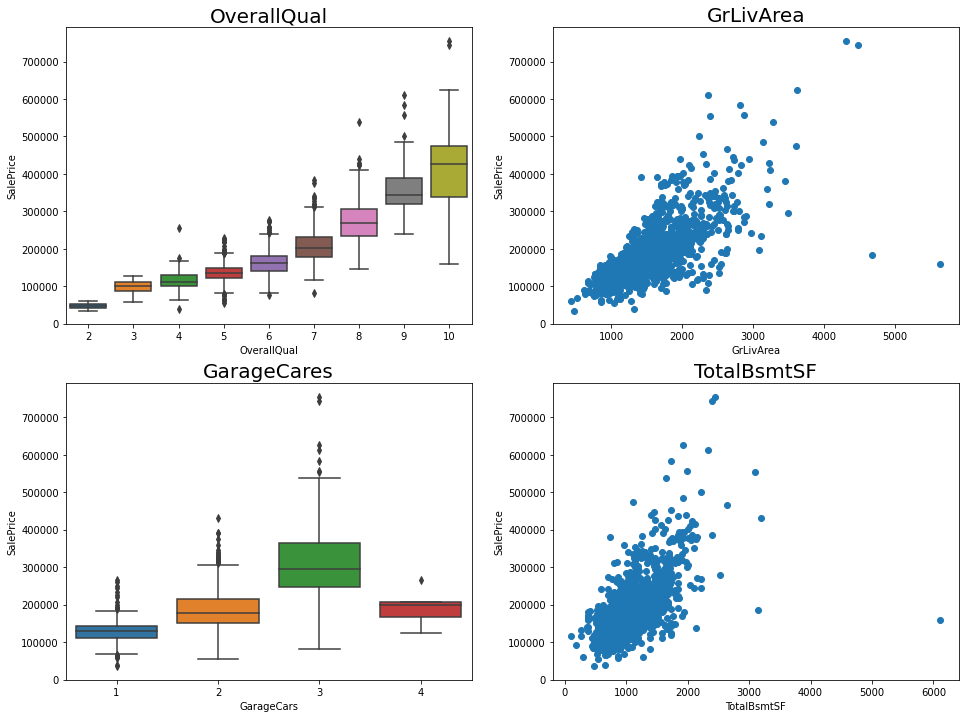

In [21]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('OverallQual', fontsize=20)

plt.subplot(2, 2, 2)
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('GrLivArea', fontsize=20)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(2, 2, 3)
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('GarageCares', fontsize=20)

plt.subplot(2, 2, 4)
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.title('TotalBsmtSF', fontsize=20)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.show()

In [22]:
for variable in df.select_dtypes(object).columns:
  print(df.groupby(variable)['SalePrice'].mean().sort_values(ascending=False), "\n")

MSZoning
FV         214888.129032
RL         196479.941839
RM         131409.785340
RH         126539.454545
C (all)     78172.500000
Name: SalePrice, dtype: float64 

Street
Pave    186965.207802
Grvl    132528.600000
Name: SalePrice, dtype: float64 

LotShape
IR2    241604.200000
IR3    216036.500000
IR1    210882.858388
Reg    170407.117008
Name: SalePrice, dtype: float64 

LandContour
HLS    236879.104167
Low    218987.500000
Lvl    185557.241294
Bnk    148604.519231
Name: SalePrice, dtype: float64 

Utilities
AllPub    186798.627524
NoSeWa    137500.000000
Name: SalePrice, dtype: float64 

LotConfig
CulDSac    227673.444444
FR3        208475.000000
Corner     187152.299180
FR2        184398.255814
Inside     182830.166144
Name: SalePrice, dtype: float64 

LandSlope
Sev    216327.500000
Mod    204801.950820
Gtl    185611.396047
Name: SalePrice, dtype: float64 

Neighborhood
NoRidge    335295.317073
NridgHt    314717.840000
StoneBr    310499.000000
Timber     244267.648649
Veenker  

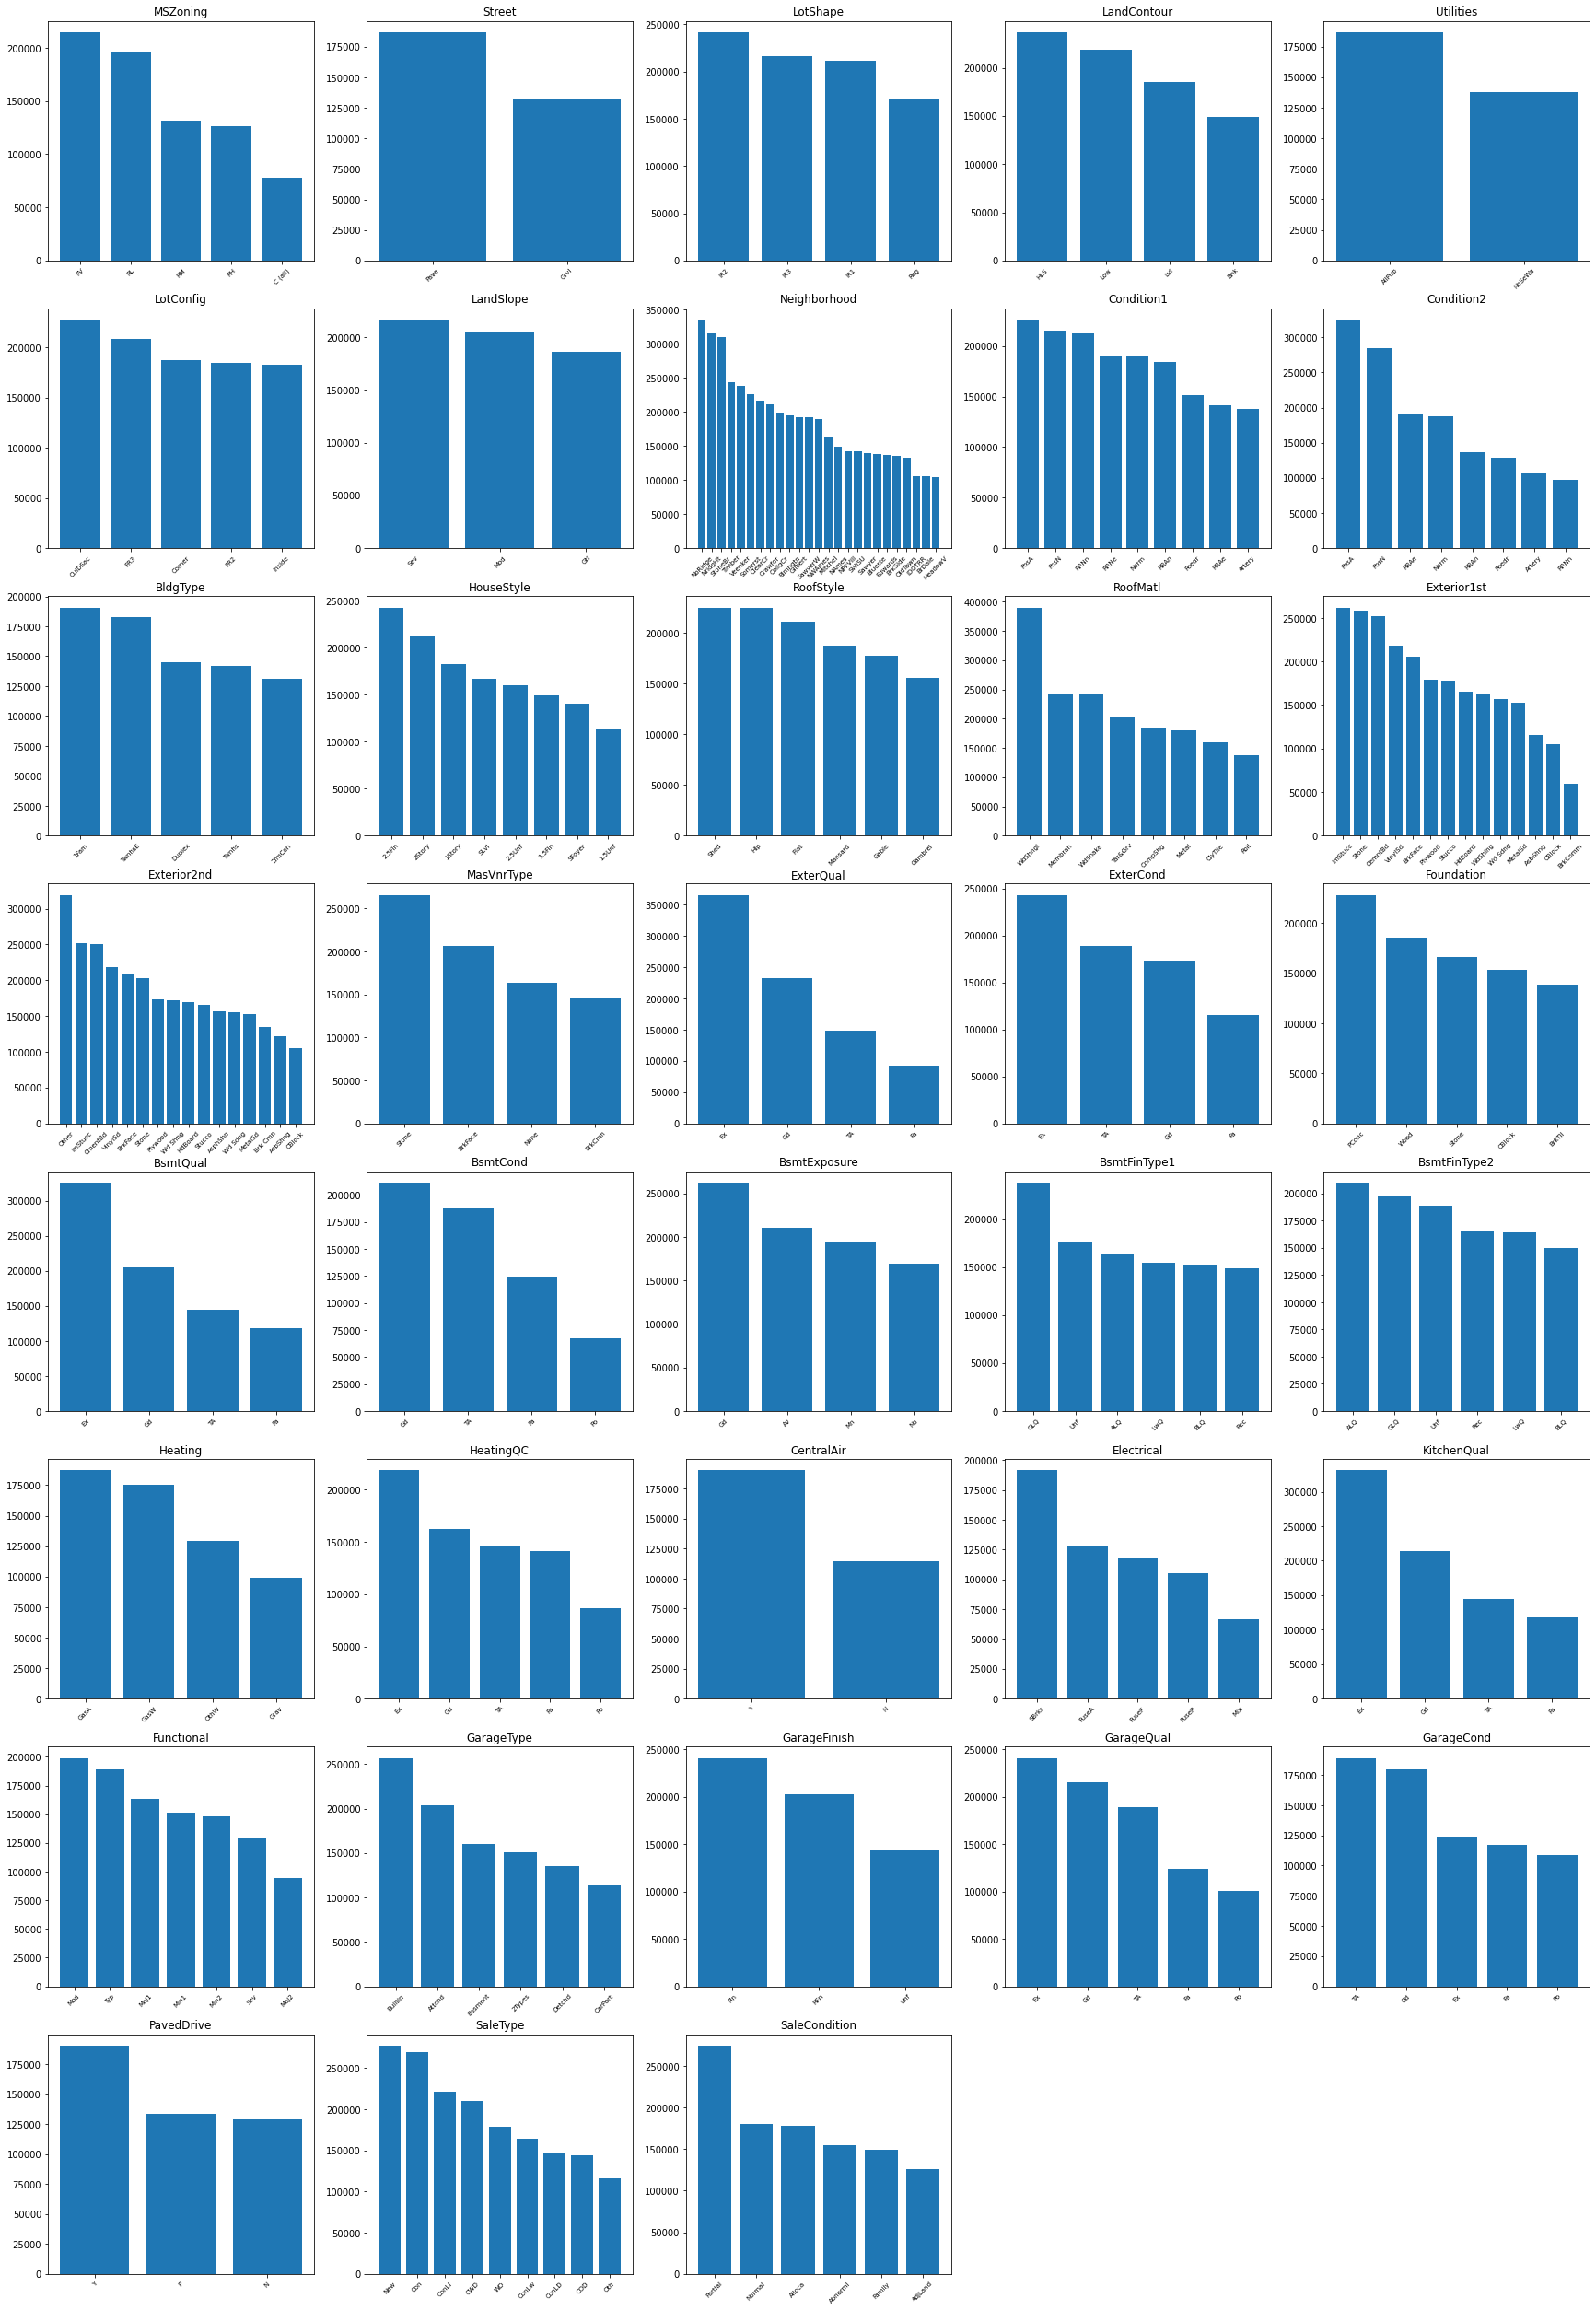

In [23]:
plt.figure(figsize=(30, 45))
for i in range(len(df.select_dtypes(object).columns)):
  plt.subplot(8, 5, i+1)
  plt.bar(df.groupby(df.select_dtypes(object).columns[i])['SalePrice'].mean().sort_values(ascending=False).index,
          df.groupby(df.select_dtypes(object).columns[i])['SalePrice'].mean().sort_values(ascending=False))
  plt.title(df.select_dtypes(object).columns[i])
  plt.xticks(fontsize=7, rotation=45)

plt.show()

I will use the following categorical variables, which are mostly related to quality:
- **ExterQual**: Exterior material quality
- **BsmtQual**: Height of the basement
- **BsmtFinType1**: Quality of basement finished area
- **KitchenQual**: Kitchen quality
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition


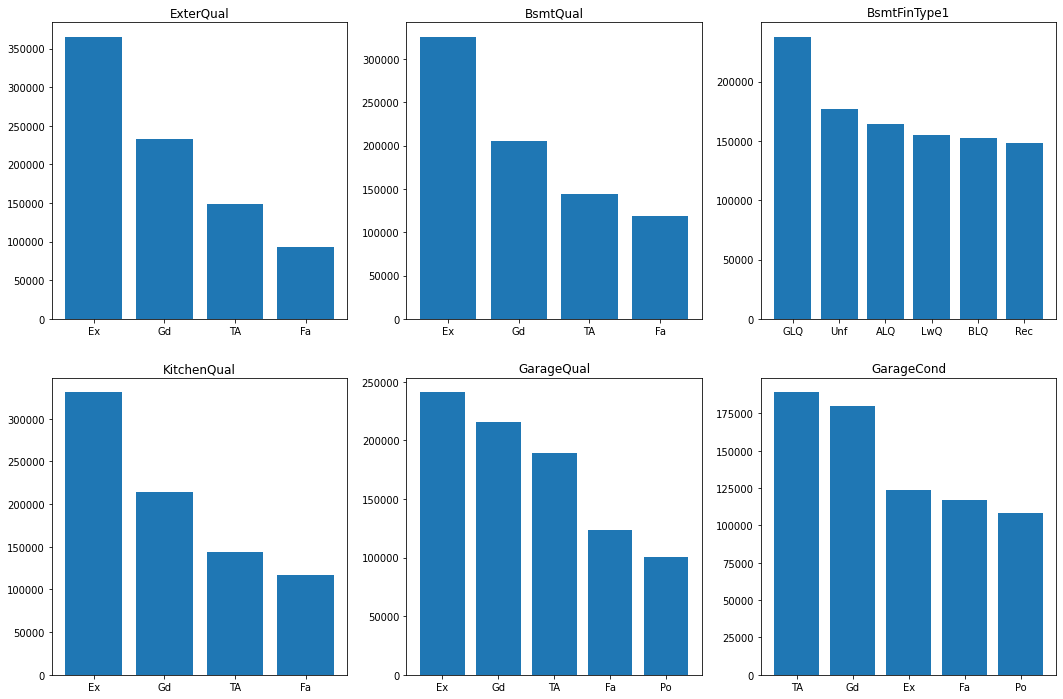

In [24]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.bar(df.groupby('ExterQual')['SalePrice'].mean().sort_values(ascending=False).index,
        df.groupby('ExterQual')['SalePrice'].mean().sort_values(ascending=False));
plt.title('ExterQual')

plt.subplot(2, 3, 2)
plt.bar(df.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending=False).index,
        df.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending=False));
plt.title('BsmtQual')

plt.subplot(2, 3, 3)
plt.bar(df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending=False).index,
        df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending=False));
plt.title('BsmtFinType1')

plt.subplot(2, 3, 4)
plt.bar(df.groupby('KitchenQual')['SalePrice'].mean().sort_values(ascending=False).index,
        df.groupby('KitchenQual')['SalePrice'].mean().sort_values(ascending=False));
plt.title('KitchenQual')

plt.subplot(2, 3, 5)
plt.bar(df.groupby('GarageQual')['SalePrice'].mean().sort_values(ascending=False).index,
        df.groupby('GarageQual')['SalePrice'].mean().sort_values(ascending=False));
plt.title('GarageQual')

plt.subplot(2, 3, 6)
plt.bar(df.groupby('GarageCond')['SalePrice'].mean().sort_values(ascending=False).index,
        df.groupby('GarageCond')['SalePrice'].mean().sort_values(ascending=False));
plt.title('GarageCond')

plt.show()

In [25]:
ExterQual = pd.get_dummies(df['ExterQual'], drop_first=True)
BsmtQual = pd.get_dummies(df['BsmtQual'], drop_first=True)
BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], drop_first=True)
KitchenQual = pd.get_dummies(df['KitchenQual'], drop_first=True)
GarageQual = pd.get_dummies(df['GarageQual'], drop_first=True)
GarageCond = pd.get_dummies(df['GarageCond'], drop_first=True)

X_cat = pd.concat([ExterQual, BsmtQual, BsmtFinType1, KitchenQual, GarageQual, GarageCond], axis=1)

**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [26]:
scaler = StandardScaler()

X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

In [27]:
X = pd.concat([X_num, X_cat], axis=1)

X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,Fa,Gd,TA,Fa,Gd,TA,BLQ,GLQ,LwQ,Rec,Unf,Fa,Gd,TA,Fa,Gd,Po,TA,Fa,Gd,Po,TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.589337,0.331321,0.202747,-0.591875,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,-0.165963,-0.529579,0.202747,0.409598,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0.589337,0.477367,0.202747,-0.434007,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,0.589337,0.344773,1.779928,-0.838543,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
5,1.344638,1.269088,1.779928,0.120996,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [28]:
y = df['SalePrice']

y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [29]:
# Using Scikit-Learn
lrm = LinearRegression()

lrm.fit(X, y)

print('Coefficients: {}\n'.format(lrm.coef_))
print('Intercept: {}'.format(lrm.intercept_))

Coefficients: [ 1.93052263e+04  2.57771861e+04  9.85739161e+03  7.21815810e+03
 -4.27364461e+04 -1.75916093e+04 -2.52349719e+04 -4.17154539e+04
 -3.46195454e+04 -4.01152286e+04  4.77855546e+01  2.50245548e+03
 -1.14978156e+04 -5.39648502e+03 -1.76527634e+04 -3.71738089e+04
 -2.78921284e+04 -3.67609025e+04 -1.01918926e+05 -8.48861206e+04
 -9.36999844e+04 -9.62843325e+04  7.31994974e+04  8.04402727e+04
  6.44431983e+04  8.13568909e+04]

Intercept: 293581.8702330848


In [30]:
# Using statsmodel

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:41:11   Log-Likelihood:                -15895.
No. Observations:                1338   AIC:                         3.184e+04
Df Residuals:                    1311   BIC:                         3.198e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.936e+05   2.59e+04     11.323      0.000    2.43e+05    3.44e+05
OverallQual  1.931e+04   1782.349     10.831      0.000    1.58e+04    2.28e+04
GrLivArea    2.578e+04   1281.902     20.109      0.000    2.33e+04    2.83e+04
GarageCars   9857.3916   1323.699      7.447      0.000    7260.592    1.25e+04
TotalBsmtSF  7218.1581   1250.482      5.772      0.000    4764.994    9671.322
Fa          -4.274e+04   1.55e+04     -2.762      0.006   -7.31e+04   -1.24e+04
Gd          -1.759e+04   6579.440     -2.674      0.008   -3.05e+04   -4684.228
TA          -2.523e+04   7281.624     -3.466      0.001   -3.95e+04    -1.1e+04
Fa          -4.172e+04   8373.926     -4.982      0.000   -5.81e+04   -2.53e+04
Gd          -3.462e+04   4458.877     -7.764      0.000   -4.34e+04   -2.59e+04
TA          -4.012e+04   5211.001     -7.698      0.000   -5.03e+04   -2.99e+04
BLQ            47.7856   3891.035      0.012      0.990   -7585.549    7681.120
GLQ          2502.4555   3395.036      0.737      0.461   -4157.842    9162.753
LwQ          -1.15e+04   4946.616     -2.324      0.020   -2.12e+04   -1793.668
Rec         -5396.4850   4061.925     -1.329      0.184   -1.34e+04    2572.099
Unf         -1.765e+04   3219.891     -5.482      0.000    -2.4e+04   -1.13e+04
Fa          -3.717e+04   9312.861     -3.992      0.000   -5.54e+04   -1.89e+04
Gd          -2.789e+04   4962.890     -5.620      0.000   -3.76e+04   -1.82e+04
TA          -3.676e+04   5545.114     -6.629      0.000   -4.76e+04   -2.59e+04
Fa          -1.019e+05   3.65e+04     -2.790      0.005   -1.74e+05   -3.03e+04
Gd          -8.489e+04   3.73e+04     -2.274      0.023   -1.58e+05   -1.17e+04
Po           -9.37e+04   4.57e+04     -2.048      0.041   -1.83e+05   -3953.421
TA          -9.628e+04    3.6e+04     -2.673      0.008   -1.67e+05   -2.56e+04
Fa            7.32e+04   4.45e+04      1.644      0.100   -1.41e+04    1.61e+05
Gd           8.044e+04   4.56e+04      1.762      0.078   -9104.434     1.7e+05
Po           6.444e+04   4.79e+04      1.344      0.179   -2.96e+04    1.59e+05
TA           8.136e+04   4.39e+04      1.852      0.064   -4812.496    1.68e+05
==============================================================================
Omnibus:                      708.209   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85127.494
Skew:                          -1.460   Prob(JB):                         0.00
Kurtosis:                      41.967   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""